# Práctica 3 - Ruidos y filtros

## 1. Convolución

In [3]:
I = imread("img/puertita.jpg");

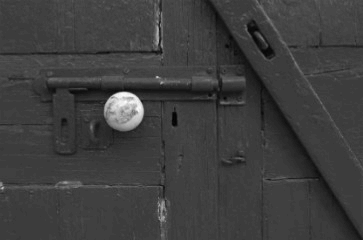

In [4]:
imshow(I)

### 1.a Filtro pasabajos

Filtro pasa bajos de 3x3

In [5]:
I2 = zeros(size(I));
for i = 2 : size(I, 1) - 1
    for j = 2 : size(I, 2) - 1
        I2(i - 1, j - 1) = sum(sum(I(i-1:i+1, j-1:j+1))) / 9;
    end
end;

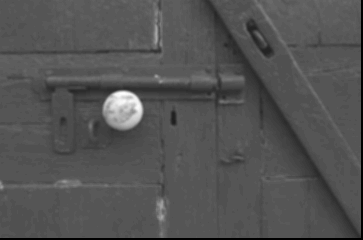

In [7]:
imshow(I2)

Filtro pasa bajos de 5x5

In [8]:
I3 = zeros(size(I));
for i = 3 : size(I, 1) - 2
    for j = 3 : size(I, 2) - 2
        I3(i, j) = sum(sum(I(i-2:i+2, j-2:j+2))) / 25;
    end
end;

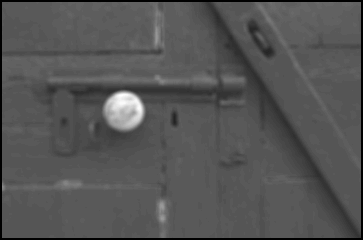

In [9]:
imshow(I3);

Generalizamos la función para cualquier tipo de filtro. Hacemos padding con 0s en la imagen de salida para que tenga el mismo tamaño que la imagen original.

In [40]:
function conv = myconv(img, filter)
    img = cast(img, 'single');
    conv = zeros(size(img));
    filterSize = size(filter, 1);
    halfSize = floor(filterSize / 2);
    
    for i = (halfSize + 1) : (size(img, 1) - halfSize)
        for j = (halfSize + 1) : (size(img, 2) - halfSize)
            x = img(i-halfSize : i+halfSize, j-halfSize : j+halfSize) .* rot90(filter, 2);
            conv(i, j) = sum(sum(x));
        end
    end;
endfunction

Si observamos la esquina superior de la imagen, la primer columna y primer fila son 0s. Comparándolo con la función `conv2` de Octave/Matlab, bajo la opción "same", ésta paddea con valores promediados en vez de 0s.

In [41]:
myconv(I, ones(3)/9)(1:5, 1:5)

ans =

    0.00000    0.00000    0.00000    0.00000    0.00000
    0.00000   82.22222   83.44444   83.88889   82.55556
    0.00000   81.22222   81.33334   81.33334   80.44445
    0.00000   81.66667   81.33333   81.11111   80.22222
    0.00000   81.88889   82.00000   82.00000   81.33334



In [42]:
conv2(I, ones(3)/9, "same")(1:5, 1:5)

ans =

   36.333   55.444   56.778   57.222   56.111
   54.222   82.222   83.444   83.889   82.556
   54.111   81.222   81.333   81.333   80.444
   54.556   81.667   81.333   81.111   80.222
   54.556   81.889   82.000   82.000   81.333



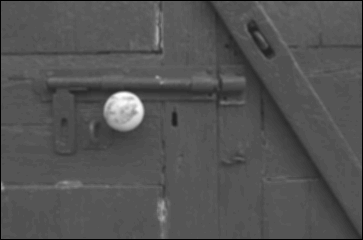

In [43]:
imshow(myconv(I, ones(3)/9))

### 1.b Filtro pasa altos

In [50]:
filt = zeros(3);
filt(2,2) = 2;
filt

filt =

   0   0   0
   0   2   0
   0   0   0



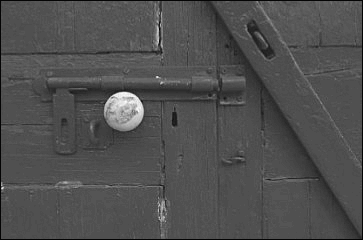

In [51]:
imshow(myconv(I, filt - ones(3)/9))

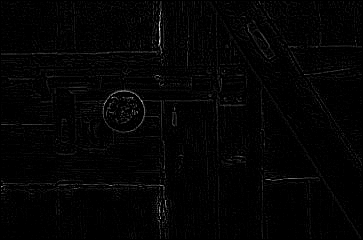

In [52]:
imshow(I - conv2(I, filt - ones(3)/9, "same"))